In [16]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
#Function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to calculate MAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


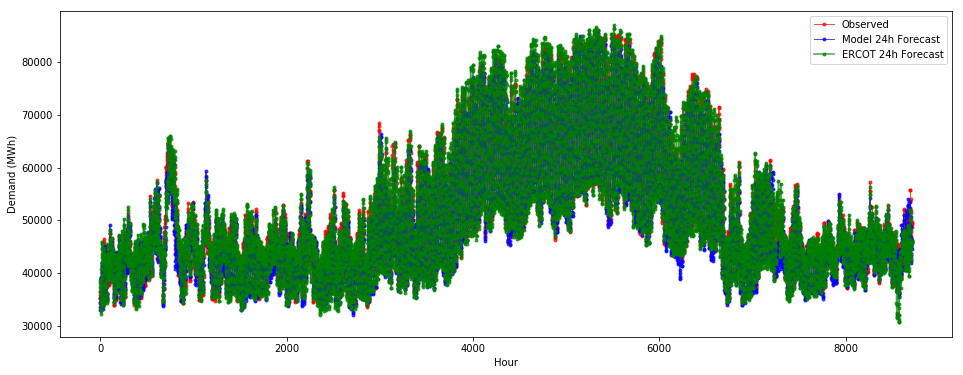

Model RMSE: 1848.9326621853368
EIA RMSE: 1769.9008984271238
Model MAE: 1356.683494174159
EIA MAE: 1297.311409901734
Model MAPE: 2.6045175102720868
EIA MAPE: 2.598477842791347


In [18]:
# GET RMSE
path = "../model_outputs/basic_ercot_2023_example_outputs.json"
mean=43558.95
std=10011.015

eia_data = pd.read_csv("../data/final_tables/erco_2023_andcomposite/erco_2023_andcomposite.csv")
data_2023 = eia_data[(eia_data["2023"]==1) & (eia_data["year"]==2023)]  
eia_forecast_data = data_2023["Demand Forecast (MWh)"].tolist()

a11_preds = pd.read_csv(
    "/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/thesis2/model_outputs/A11_2023_preds.csv"
)['predicted'][:-48]


observed = []
predicted = []
basicnet_month_preds = {}
ercot_month_preds = {}
a11_month_preds = {}
month_actuals = {}
with open(path, 'r') as file:
    data = json.load(file)
    for i in range(len(data['source_readings'])):
        expected_ex = data['expected'][i][0]
        predicted_ex = data['predicted'][i][0]
#         print(data['source_readings'][i])
        observed += expected_ex
        predicted += predicted_ex

    predicted = np.array(predicted)*std+mean
    observed= np.array(observed)*std+mean
    
    eia_forecast_data=eia_forecast_data[:len(predicted)]
    
    start=24*31*2
    predicted = predicted#[start:start+24*41]
    observed = observed#[start:start+24*41]
    eia_forecast_data=eia_forecast_data#[start:start+24*41]
    
    plt.figure(figsize=(16, 6))  # Set the figure size for better visibility
    plt.plot(observed,linestyle='-', c='r', marker='.', linewidth=1, alpha=0.7, label="Observed")
    plt.plot(predicted,linestyle='-', c='b', marker='.', linewidth=1, alpha=0.7, label="Model 24h Forecast")
    plt.plot(eia_forecast_data,linestyle='-', c='g', marker='.', alpha=0.7, label="ERCOT 24h Forecast")
    plt.xlabel('Hour')
    plt.ylabel('Demand (MWh)')
    plt.legend()

    plt.show()

    model_rmse = rmse(predicted, observed)
    eia_rmse = rmse(eia_forecast_data, observed)
    model_mae = mean_absolute_error(predicted, observed)
    eia_mae = mean_absolute_error(eia_forecast_data, observed)
    model_mape = mape(observed, predicted)
    eia_mape = mape(observed, eia_forecast_data)
    
    days_per_month = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31,30,29]
    
    hours_before=0
    for i, days in enumerate(days_per_month):
        basicnet_month_preds[i] = predicted[hours_before:hours_before+days*24]
        ercot_month_preds[i]=eia_forecast_data[hours_before:hours_before+days*24]
        a11_month_preds[i]=a11_preds[hours_before:hours_before+days*24]
        month_actuals[i] = observed[hours_before:hours_before+days*24]
        hours_before+=days*24
        

    print(f"Model RMSE: {model_rmse}")
    print(f"EIA RMSE: {eia_rmse}")
    print(f"Model MAE: {model_mae}")
    print(f"EIA MAE: {eia_mae}")
    print(f"Model MAPE: {model_mape}")
    print(f"EIA MAPE: {eia_mape}")


In [19]:
len(predicted)/24

363.0

In [20]:
rmses = []

a11_rmses=np.array([2439.8996716796414,
 2667.837037369285,
 1694.6502817116786,
 1917.4076141054672,
 2134.082561067227,
 1793.3128944309242,
 1785.323622293744,
 2242.592404526788,
 2304.0217316151266,
 2180.5768622841138,
 1453.1333607586148,
 1369.7930888427477])

maes = []
mapes = []
for i in range(12):
    month_pred=month_preds[i]
    ercot_pred=ercot_preds[i]
    month_actual=month_actuals[i] 
    model_rmse=rmse(month_pred, month_actual)
    ercot_rmse=rmse(ercot_pred, month_actual)
    
    model_mae = mean_absolute_error(month_actual, month_pred)
    model_mape = mape(month_actual, month_pred)
    
    rmses.append((model_rmse, ercot_rmse))
    maes.append(model_mae)
    mapes.append(model_mape)
# Unpack the tuples into separate lists
model_rmse, eia_rmse = zip(*rmses)

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
plt.scatter(month_names, model_rmse, marker='x', color='blue',s=75, label='BasicNet RMSE')
plt.scatter(month_names, a11_rmses, marker='o', color='red', label='A11 RMSE')
# plt.scatter(month_names, eia_rmse, marker='s', color='red', label='ERCOT RMSE')


# Label the axes
plt.xlabel('Month')
plt.ylabel('RMSE')

# Set y-axis to start at 0
plt.ylim(bottom=0)

# Add a title
# plt.title('Monthly Comparison of Model RMSE vs ERCOT RMSE')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.savefig(f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/basicnet_monthly_rmse.pdf", 
            format="pdf", 
            bbox_inches="tight")

# Show the plot
plt.show()

NameError: name 'month_preds' is not defined

In [76]:
basic_rmses = np.array([r[0] for r in rmses])

In [77]:
a11_rmses-basic_rmses

array([1047.26338275,  911.26898704,  115.58781416,  107.99184107,
       -428.05838968,    4.2635056 , -300.46795663,  421.20174693,
        244.77483749,   46.28294003,  204.40282211, -144.10057822])

In [47]:
def generate_hourly_metrics(
    basicnet_month_preds,
    a11_month_preds,
    ercot_month_preds,
    month_actuals,
    months: [int],
    save=False,
):
    """
    Month: [0,11]
    """
    months_map = {1: "January", 
                 2: "February",
                 3: "March",
                 4: "April",
                 5: "May",
                 6: "June",
                 7: "July",
                 8: "August",
                 9: "September",
                 10: "October",
                 11: "November",
                 12: "December",}
    #Function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Function to calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    
    basic_preds = []
    a11_preds = []
    ercot_preds = []
    actuals = []
    
    for month in months:
        basic_preds.extend(basicnet_month_preds[month])
        a11_preds.extend(a11_month_preds[month])
        ercot_preds.extend(ercot_month_preds[month])
        actuals.extend(month_actuals[month])
    
        
    basic_preds = np.array(basic_preds)
    a11_preds = np.array(a11_preds)
    ercot_preds = np.array(ercot_preds)
    actuals = np.array(actuals)
    
    print(f"Basic RMSE: {rmse(np.array(basic_preds),np.array(actuals))}")
    print(f"A11 RMSE: {rmse(np.array(a11_preds), np.array(actuals))}")
    print(f"ERCOT RMSE: {rmse(np.array(ercot_preds), np.array(actuals))}")
    
    print(f"Basic MAE: {mean_absolute_error(np.array(basic_preds),np.array(actuals))}")
    print(f"A11 MAE: {mean_absolute_error(np.array(a11_preds), np.array(actuals))}")
    print(f"ERCOT MAE: {mean_absolute_error(np.array(ercot_preds), np.array(actuals))}")
    
    print(f"Basic MAPE: {mape(np.array(actuals), np.array(basic_preds))}")
    print(f"A11 MAPE: {mape(np.array(actuals), np.array(a11_preds))}")
    print(f"ERCOT MAPE: {mape(np.array(actuals), np.array(ercot_preds))}")
    
    length = len(basic_preds)
    
    hours = np.tile(np.arange(24), length // 24) # Hour labels for each entry

    # Function to calculate hourly RMSE
    def calculate_hourly_rmse(forecast, actuals):
        hourly_rmse = []
        for hour in range(24):
            mask = hours == hour
            mse = np.mean((forecast[mask] - actuals[mask])**2)
            rmse = np.sqrt(mse)
            hourly_rmse.append(rmse)
        return hourly_rmse
    
    # Function to calculate hourly RMSE
    def calculate_hourly_mae(forecast, actuals):
        hourly_mae = []
        for hour in range(24):
            mask = hours == hour
            mae = mean_absolute_error(actuals[mask], forecast[mask])
            hourly_mae.append(mae)
        return hourly_mae
    
    # Function to calculate hourly RMSE
    def calculate_hourly_mape(forecast, actuals):
        hourly_mape = []
        for hour in range(24):
            mask = hours == hour
            err = mape(actuals[mask], forecast[mask])
            hourly_mape.append(err)
        return hourly_mape

    # Calculate hourly RMSE for each forecast
    basic_hourly_rmse = calculate_hourly_rmse(basic_preds, actuals)
    a11_hourly_rmse = calculate_hourly_rmse(a11_preds, actuals)
    ercot_hourly_rmse = calculate_hourly_rmse(ercot_preds, actuals)
    
    # Calculate hourly MAE for each forecast
    basic_hourly_mae = calculate_hourly_mae(basic_preds, actuals)
    a11_hourly_mae = calculate_hourly_mae(a11_preds, actuals)
    ercot_hourly_mae = calculate_hourly_mae(ercot_preds, actuals)
    
    # Calculate hourly RMSE for each forecast
    basic_hourly_mape = calculate_hourly_mape(basic_preds, actuals)
    a11_hourly_mape = calculate_hourly_mape(a11_preds, actuals)
    ercot_hourly_mape = calculate_hourly_mape(ercot_preds, actuals)
    
    # Prepare data for plotting
    hours = np.arange(24)
    metrics_data = {
        'RMSE': { 'ERCOT': ercot_hourly_rmse, 'A11': a11_hourly_rmse,'Basic': basic_hourly_rmse },
        'MAE': {'ERCOT': ercot_hourly_mae, 'A11': a11_hourly_mae,'Basic': basic_hourly_mae},
        'MAPE': {'ERCOT': ercot_hourly_mape, 'A11': a11_hourly_mape,'Basic': basic_hourly_mape}
#         'RMSE': { 'ERCOT': ercot_hourly_rmse,},
#         'MAE': {'ERCOT': ercot_hourly_mae,},
#         'MAPE': {'ERCOT': ercot_hourly_mape, }
    }

#     print(f"A11 hourly rmse: {a11_hourly_rmse}")
    for i, r in enumerate(basic_hourly_rmse):
        print(f"{i}: {round(r)}")
    # Plotting
    plt.figure(figsize=(18, 6))
    for i, (metric, forecasts) in enumerate(metrics_data.items(), 1):
        plt.subplot(1, 3, i)  # 1 row, 3 columns, ith subplot
        for label, values in forecasts.items():
            plt.plot(hours, values, label=label, marker='o' if label == 'ERCOT' else 'x')
        plt.title(f'{metric} by Hour')
        plt.xlabel('Hour')
        plt.ylabel(metric)
#         plt.legend()
        plt.ylim(bottom=0)
        plt.grid(True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    if save:
        plt.savefig(
            f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/ercot_hourly_errors.pdf", 
            format="pdf", 
            bbox_inches="tight")
    plt.show()




Basic RMSE: 1848.9326621853368
A11 RMSE: 2032.6278423839829
ERCOT RMSE: 1769.9008984271238
Basic MAE: 1356.683494174159
A11 MAE: 1492.2769562971614
ERCOT MAE: 1297.311409901734
Basic MAPE: 2.6045175102720868
A11 MAPE: 2.9300506114219522
ERCOT MAPE: 2.598477842791347
0: 553
1: 729
2: 753
3: 804
4: 905
5: 998
6: 1175
7: 1401
8: 1457
9: 1425
10: 1562
11: 1604
12: 1801
13: 1979
14: 2164
15: 2341
16: 2426
17: 2508
18: 2644
19: 2652
20: 2453
21: 2340
22: 2360
23: 2255


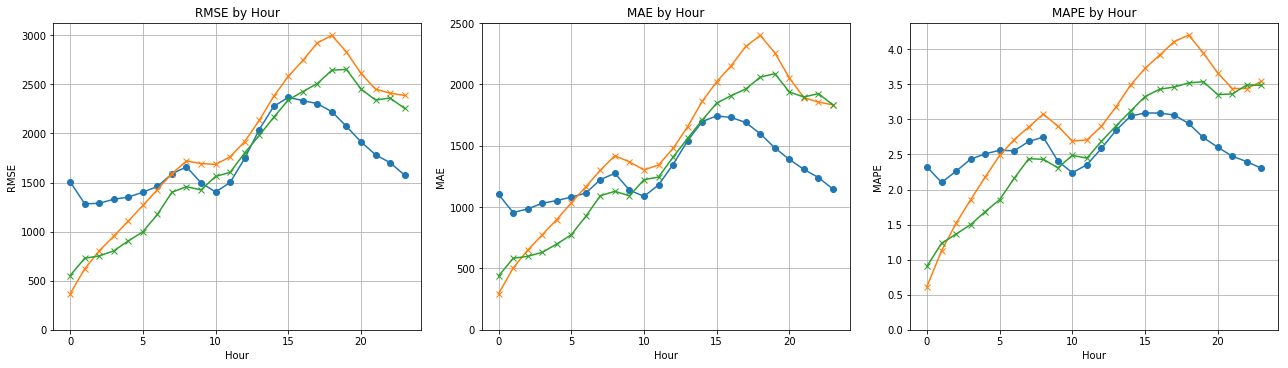

In [48]:
generate_hourly_metrics(
    basicnet_month_preds,
    a11_month_preds,
    ercot_month_preds,
    month_actuals,
    months=[0,1,2,3,4,5,6,7,8,9,10,11],
    save=False
)

In [14]:
months_map = {1: "January", 
                 2: "February",
                 3: "March",
                 4: "April",
                 5: "May",
                 6: "June",
                 7: "July",
                 8: "August",
                 9: "September",
                 10: "October",
                 11: "November",
                 12: "December",}

for m in range(12):
    print("\begin{figure}[ht!]")
    print("\centering")
    print(f"\\includegraphics[width=\textwidth]\{./Figures/a11_basicnet_{m+1}.pdf\}")
    print(f"\caption\{A11 and BasicNet forecasts for {months_map[m+1]} 2023.\}")
    print(f"\label\{fig:a11_basicnet_{m+1}\}")
    print("\end{figure}")


SyntaxError: f-string expression part cannot include a backslash (<ipython-input-14-e72e671aee30>, line 17)

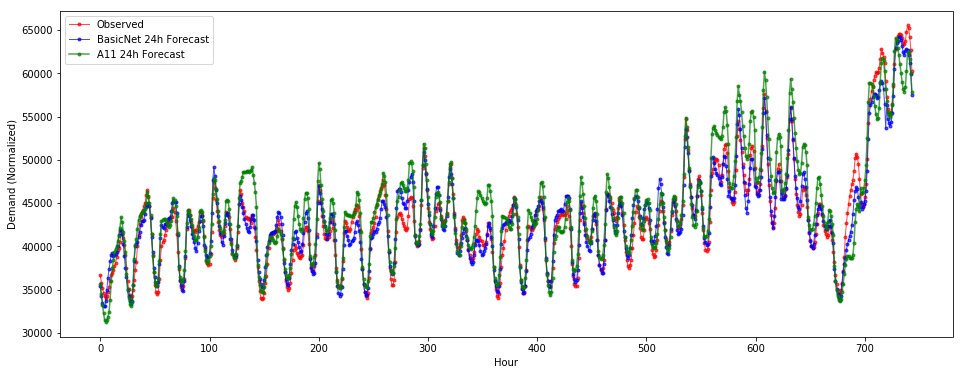

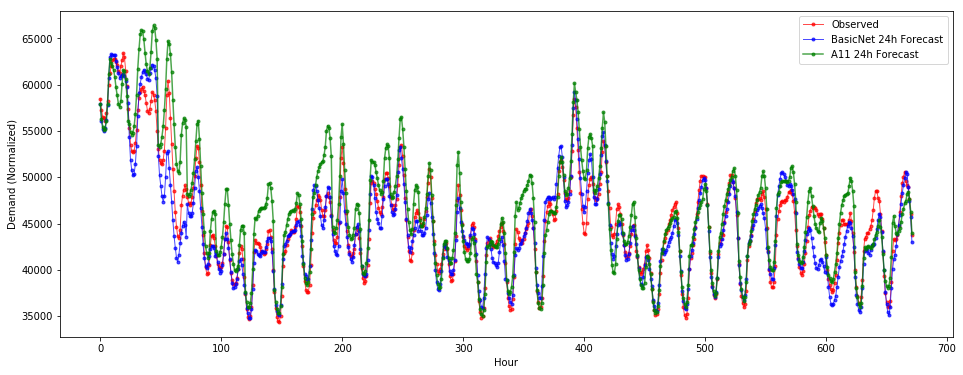

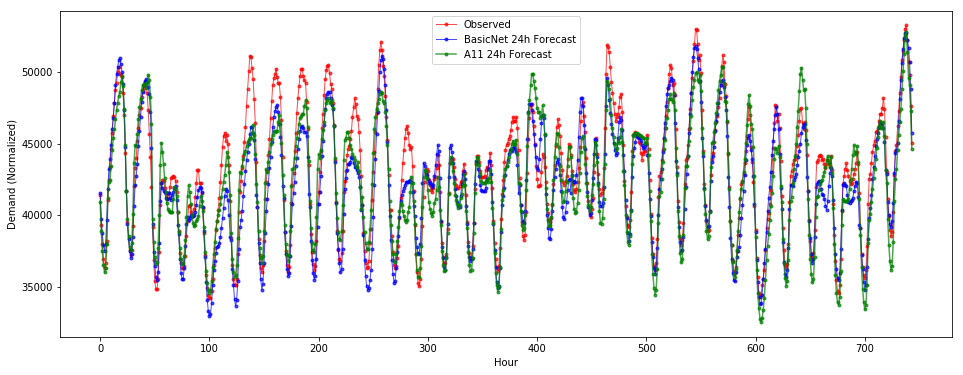

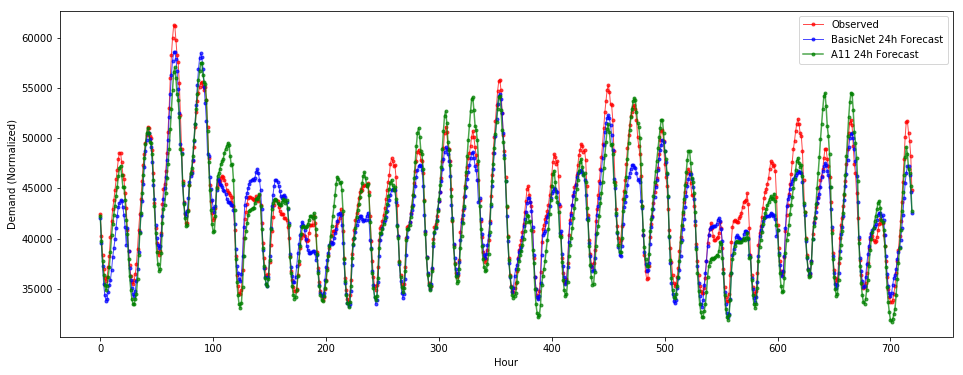

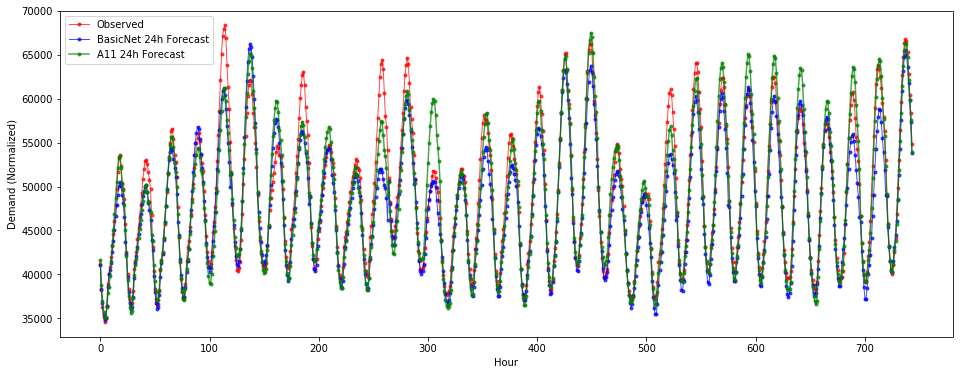

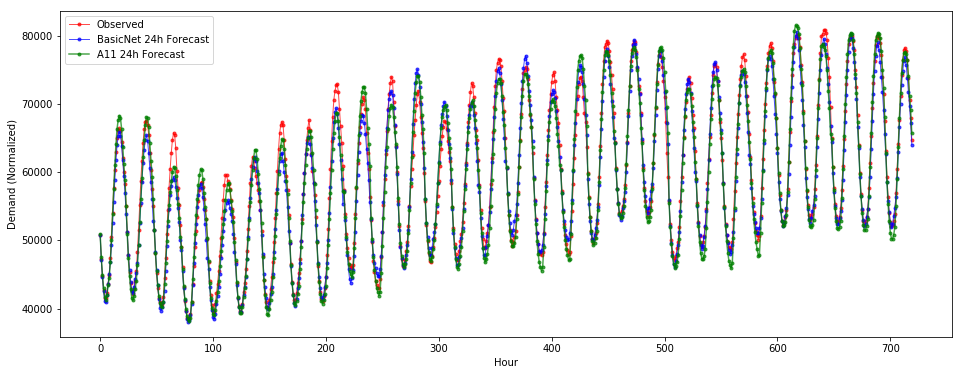

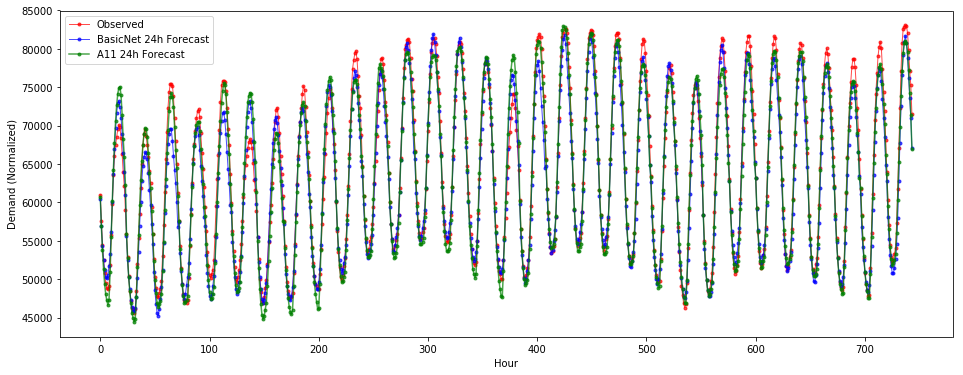

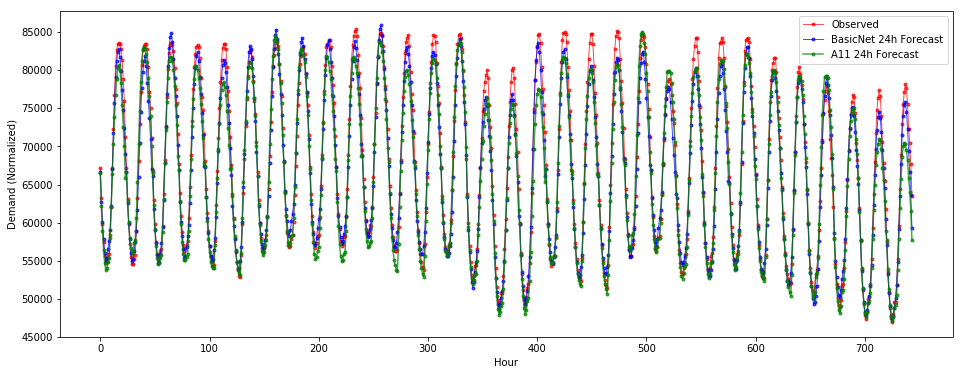

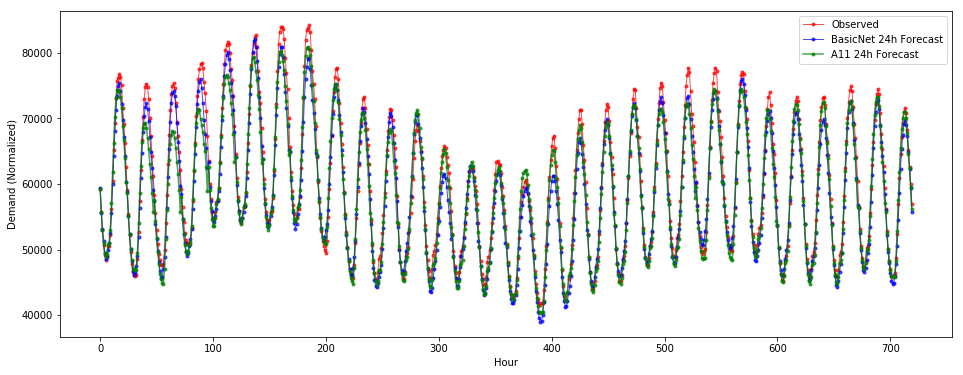

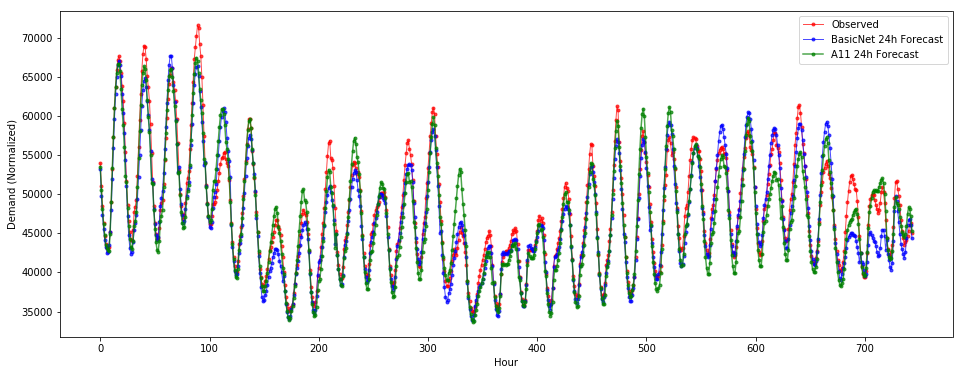

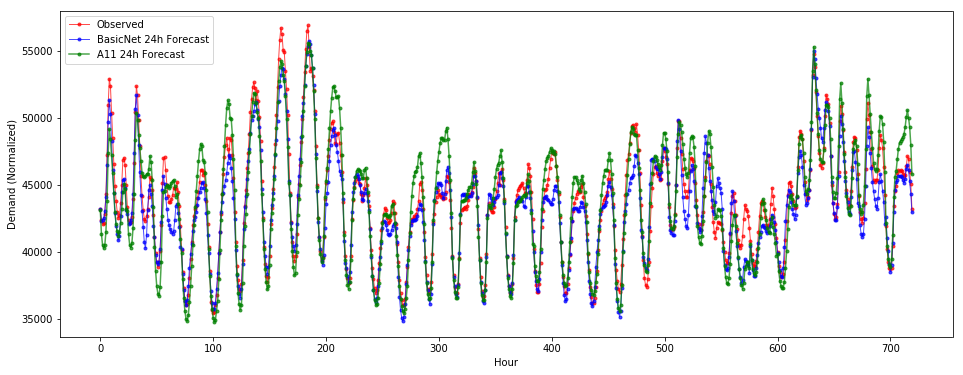

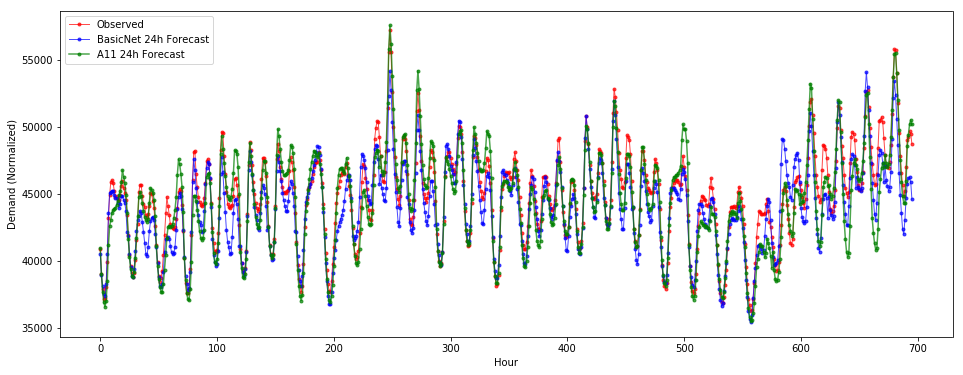

In [12]:
for m in range(12):
    plt.figure(figsize=(16, 6))  # Set the figure size for better visibility
    x_axis = np.arange(len(month_actuals[m]))
    plt.plot(x_axis, month_actuals[m],linestyle='-', c='r', marker='.', linewidth=1, alpha=0.7, label="Observed")
    plt.plot(x_axis, basicnet_month_preds[m],linestyle='-', c='b', marker='.', linewidth=1, alpha=0.7, label="BasicNet 24h Forecast")
    plt.plot(x_axis, a11_month_preds[m],linestyle='-', c='g', marker='.', alpha=0.7, label="A11 24h Forecast")
    plt.xlabel('Hour')
    plt.ylabel('Demand (MWh)')
    plt.legend()
    plt.savefig(
            f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/a11_basicnet_{m+1}.pdf", 
            format="pdf", 
            bbox_inches="tight")
    plt.show()

In [194]:
def generate_hourly_difference(
    basicnet_month_preds,
    a11_month_preds,
    month_actuals,
    months: [int],
    save=False,
):
    """
    Month: [0,11]
    """
    months_map = {1: "January", 
                 2: "February",
                 3: "March",
                 4: "April",
                 5: "May",
                 6: "June",
                 7: "July",
                 8: "August",
                 9: "September",
                 10: "October",
                 11: "November",
                 12: "December",}
    #Function to calculate RMSE
    def rmse(y_true, y_pred):
        return np.sqrt(mean_squared_error(y_true, y_pred))

    # Function to calculate MAPE
    def mape(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    
    basic_preds = []
    a11_preds = []
    actuals = []
    
    for month in months:
        basic_preds.extend(basicnet_month_preds[month])
        a11_preds.extend(a11_month_preds[month])
        actuals.extend(month_actuals[month])
    
        
    basic_preds = np.array(basic_preds)
    a11_preds = np.array(a11_preds)
    actuals = np.array(actuals)
    
    print(f"Basic RMSE: {rmse(np.array(basic_preds),np.array(actuals))}")
    print(f"A11 RMSE: {rmse(np.array(a11_preds), np.array(actuals))}")
    
    print(f"Basic MAE: {mean_absolute_error(np.array(basic_preds),np.array(actuals))}")
    print(f"A11 MAE: {mean_absolute_error(np.array(a11_preds), np.array(actuals))}")
    
    print(f"Basic MAPE: {mape(np.array(actuals), np.array(basic_preds))}")
    print(f"A11 MAPE: {mape(np.array(actuals), np.array(a11_preds))}")
    
    length = len(basic_preds)
    
    hours = np.tile(np.arange(24), length // 24) # Hour labels for each entry

    # Function to calculate hourly RMSE
    def calculate_hourly_rmse(forecast, actuals):
        hourly_rmse = []
        for hour in range(24):
            mask = hours == hour
            mse = np.mean((forecast[mask] - actuals[mask])**2)
            rmse = np.sqrt(mse)
            hourly_rmse.append(rmse)
        return hourly_rmse
    
    # Function to calculate hourly RMSE
    def calculate_hourly_mae(forecast, actuals):
        hourly_mae = []
        for hour in range(24):
            mask = hours == hour
            mae = mean_absolute_error(actuals[mask], forecast[mask])
            hourly_mae.append(mae)
        return hourly_mae
    
    # Function to calculate hourly RMSE
    def calculate_hourly_mape(forecast, actuals):
        hourly_mape = []
        for hour in range(24):
            mask = hours == hour
            err = mape(actuals[mask], forecast[mask])
            hourly_mape.append(err)
        return hourly_mape

    # Calculate hourly RMSE for each forecast
    basic_hourly_rmse = calculate_hourly_rmse(basic_preds, actuals)
    a11_hourly_rmse = calculate_hourly_rmse(a11_preds, actuals)
    
    # Calculate hourly MAE for each forecast
    basic_hourly_mae = calculate_hourly_mae(basic_preds, actuals)
    a11_hourly_mae = calculate_hourly_mae(a11_preds, actuals)
    
    # Calculate hourly RMSE for each forecast
    basic_hourly_mape = calculate_hourly_mape(basic_preds, actuals)
    a11_hourly_mape = calculate_hourly_mape(a11_preds, actuals)
    
    # Prepare data for plotting
    hours = np.arange(24)
    metrics_data = {
        'RMSE': {'A11': a11_hourly_rmse,'Basic': basic_hourly_rmse },
        'MAE': {'A11': a11_hourly_mae,'Basic': basic_hourly_mae},
        'MAPE': {'A11': a11_hourly_mape,'Basic': basic_hourly_mape}
    }

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(hours, np.array(metrics_data['MAPE']['A11']), label="A11", marker='x')
    plt.plot(hours, np.array(metrics_data['MAPE']['Basic']), label="BasicNet", marker='x')
    plt.plot(hours, np.array(metrics_data['MAPE']['A11'])-np.array(metrics_data['MAPE']['Basic']), label="A11-BasicNet", marker='o')
    plt.ylabel("MAPE")
    plt.legend()
    plt.grid(True)

    
#     for i, (metric, forecasts) in enumerate(metrics_data.items(), 1):
# #         plt.subplot(1, 3, i)  # 1 row, 3 columns, ith subplot
#         for label, values in forecasts.items():
            
# #         if metric=='MAPE':
# #             plt.plot(hours, np.array(metrics_data['MAPE']['A11'])-np.array(metrics_data['MAPE']['Basic']))
#         plt.title(f'{metric} by Hour')
#         plt.xlabel('Hour')
#         plt.ylabel(metric)
#         plt.legend()
#         plt.ylim(bottom=0)
#         plt.grid(True)
    plt.tight_layout(rect=[0, 0.03, 1, 0.9])
    
    if save:
        plt.savefig(
            f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/error_accumulation.pdf", 
            format="pdf", 
            bbox_inches="tight")
    plt.show()


#     plt.figure(figsize=(18, 6))
#     plt.plot(hours, np.array(metrics_data['MAPE']['A11'])-np.array(metrics_data['MAPE']['Basic']))
#     print(metrics_data['MAE']['A11'])
    

Basic RMSE: 1848.9326621853368
A11 RMSE: 2032.6278423839829
Basic MAE: 1356.683494174159
A11 MAE: 1492.2769562971614
Basic MAPE: 2.6045175102720868
A11 MAPE: 2.9300506114219522


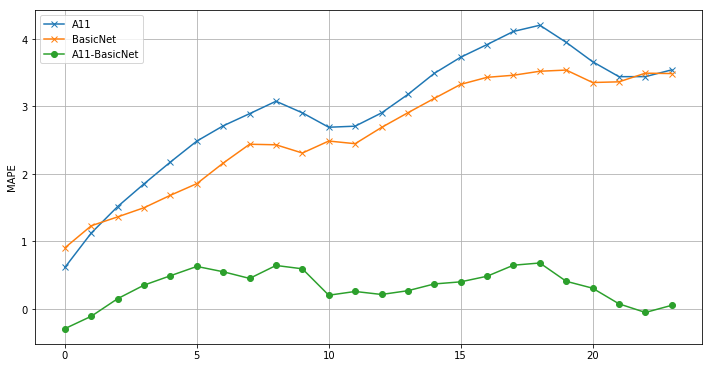

In [195]:
generate_hourly_difference(
    basicnet_month_preds,
    a11_month_preds,
    month_actuals,
    months=[0,1,2,3,4,5,6,7,8,9,10,11],
    save=True
)

In [56]:
def calculate_over_under_forecasting_errors(forecast, actuals):
    over_forecasting_errors = []
    under_forecasting_errors = []
    
    length = len(predicted)
    hours = np.tile(np.arange(24), length // 24) # Hour labels for each entry

    for hour in range(24):
        mask = hours == hour
        hourly_differences = forecast[mask] - actuals[mask]
        
        # Over-forecasting errors
        over_errors = hourly_differences[hourly_differences > 0]
        over_forecasting_errors.append(np.mean(over_errors) if over_errors.size > 0 else 0)
        
        # Under-forecasting errors
        under_errors = hourly_differences[hourly_differences < 0]
        under_forecasting_errors.append(np.abs(np.mean(under_errors)) if under_errors.size > 0 else 0)
        
    return over_forecasting_errors, under_forecasting_errors

# Calculate over and under forecasting errors for each forecast
forecast_models = [predicted, a11_preds]#, np.array(eia_forecast_data)]
model_names = ['BasicNet', 'A11', 'ERCOT']

0: 500
1: 644
2: 627
3: 671
4: 774
5: 847
6: 954
7: 1142
8: 1114
9: 1189
10: 1366
11: 1405
12: 1555
13: 1680
14: 1829
15: 1994
16: 2071
17: 2134
18: 2306
19: 2288
20: 2170
21: 2111
22: 2095
23: 2038
0: 326
1: 526
2: 682
3: 773
4: 874
5: 982
6: 1145
7: 1259
8: 1385
9: 1355
10: 1292
11: 1308
12: 1456
13: 1566
14: 1809
15: 1964
16: 2134
17: 2344
18: 2456
19: 2320
20: 2122
21: 1883
22: 1893
23: 1887


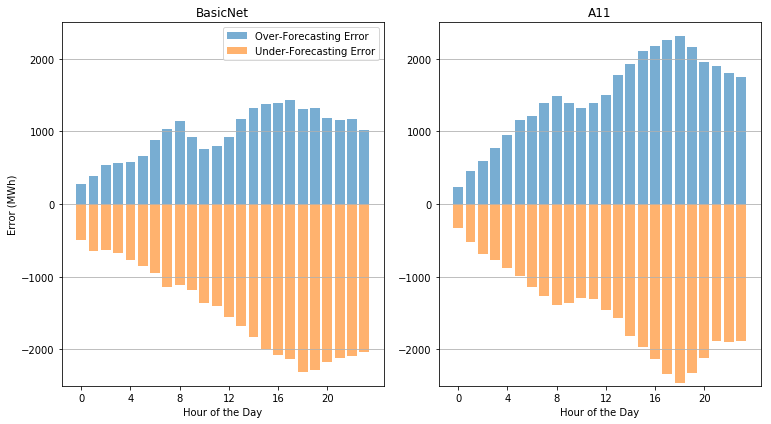

In [61]:
plt.figure(figsize=(16, 6))

for i, forecast in enumerate(forecast_models, 1):
    over_errors, under_errors = calculate_over_under_forecasting_errors(forecast, observed)
    for j, e in enumerate(under_errors):
        print(f"{j}: {round(e)}")
#     print(over_errors)
    
    # Adjust under_errors to be negative for visual representation
    under_errors = [-error for error in under_errors]
    
    plt.subplot(1, 3, i)
    plt.bar(range(24), over_errors, label='Over-Forecasting Error', alpha=0.6)
    plt.bar(range(24), under_errors, label='Under-Forecasting Error', alpha=0.6)
    plt.title(model_names[i-1])
    plt.xlabel('Hour of the Day')
    if i==1:
        plt.ylabel('Error (MWh)')
    plt.ylim(-2500, 2500)
    if i==1:
        plt.legend()
    plt.xticks(range(0, 24, 4)) 
    plt.grid(True, axis='y')

plt.tight_layout()
# plt.savefig(
#     f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/over_under_forecasting.pdf", 
#     format="pdf", 
#     bbox_inches="tight")
plt.show()


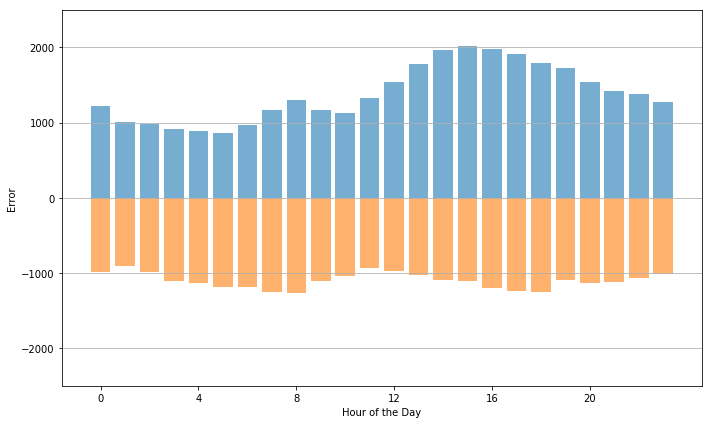

In [54]:
plt.figure(figsize=(10, 6))
over_errors, under_errors = calculate_over_under_forecasting_errors(np.array(eia_forecast_data), observed)

# Adjust under_errors to be negative for visual representation
under_errors = [-error for error in under_errors]

plt.bar(range(24), over_errors, label='Over-Forecasting Error', alpha=0.6)
plt.bar(range(24), under_errors, label='Under-Forecasting Error', alpha=0.6)
plt.xlabel('Hour of the Day')
plt.ylabel('Error')
plt.ylim(-2500, 2500)
if i==1:
    plt.legend()
plt.xticks(range(0, 24, 4)) 
plt.grid(True, axis='y')

plt.tight_layout()
plt.savefig(
    f"/Users/aidanwiteck/Desktop/Princeton/Year 4/Thesis/Homeworks/FinalThesis/Figures/ercot_over_under_forecasting.pdf", 
    format="pdf", 
    bbox_inches="tight")
plt.show()

In [24]:
rmses, maes, mapes = [], [], []
for i in range(12):
    month_pred = basicnet_month_preds[i]
    month_actual=month_actuals[i]
    model_rmse = rmse(month_actual, month_pred)
    model_mae = mean_absolute_error(month_actual, month_pred)
    model_mape = mape(month_actual, month_pred)

    rmses.append(model_rmse)
    maes.append(model_mae)
    mapes.append(model_mape)


In [25]:
rmses

[1392.6362889259844,
 1756.568050329705,
 1579.062467548212,
 1809.4157730370632,
 2562.140950751821,
 1789.0493888269878,
 2085.791578924301,
 1821.3906575957803,
 2059.246894124598,
 2134.2939222538917,
 1248.7305386513206,
 1513.893667063907]

In [26]:
maes

[1050.5393247339814,
 1264.2328034705715,
 1195.601755344305,
 1356.669682934596,
 1799.3293366729695,
 1342.286669552686,
 1570.2701085851352,
 1387.0278402107765,
 1610.7248299431508,
 1559.689724229182,
 933.1372891183553,
 1184.718446845285]

In [27]:
mapes

[2.412043936503131,
 2.7313911140241327,
 2.731920492650104,
 3.0582275083803903,
 3.4144171183997805,
 2.180696889138355,
 2.3506420451140646,
 1.9552239498713864,
 2.6069756671458233,
 3.1199709148612986,
 2.087806561380318,
 2.6013425543224975]